In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [526]:
df = pd.read_csv("student_academics.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


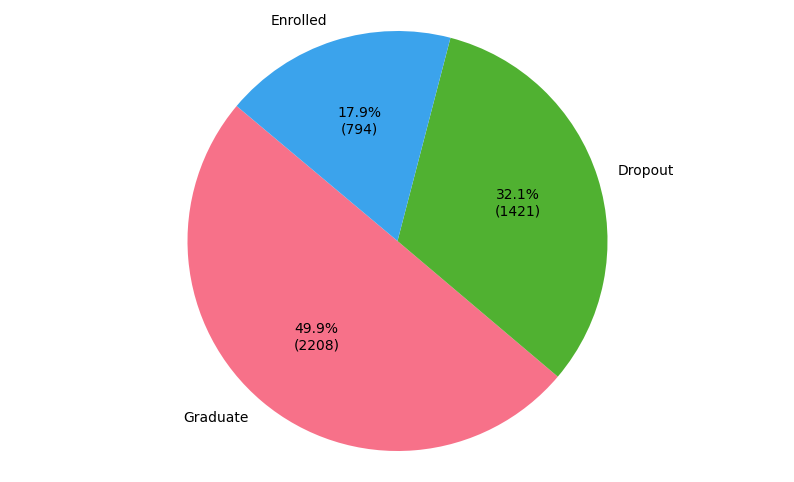

In [521]:
target_counts = df['Target'].value_counts()
# Plot the pie chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(target_counts))
sns.set_palette(colors)
plt.pie(target_counts, labels=target_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(target_counts) / 100)})', startangle=140)
plt.axis('equal')
plt.show()

In [522]:
# Separate rows with 'Target' as 'Enrolled' into a new DataFrame
df_enrolled = df[df['Target'] == 'Enrolled']

In [523]:
df_enrolled.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
16,1,9,1,10,1,1,1,13,28,6,...,0,6,14,2,11.0,0,10.8,1.4,1.74,Enrolled
19,1,1,1,16,1,1,1,13,14,8,...,0,7,8,6,13.5,0,16.2,0.3,-0.92,Enrolled


In [528]:
df = df[df['Target'] != 'Enrolled']

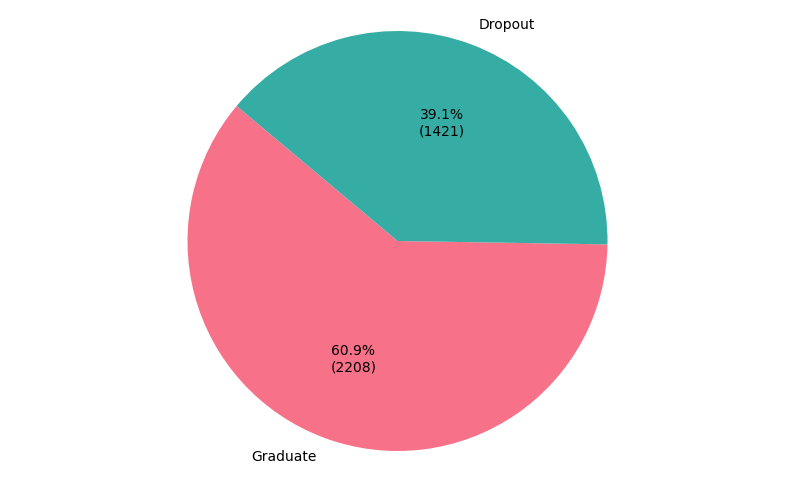

In [529]:
target_counts = df['Target'].value_counts()
# Plot the pie chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(target_counts))
sns.set_palette(colors)
plt.pie(target_counts, labels=target_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(target_counts) / 100)})', startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
target_counts = df['Target'].value_counts()
# Plot the pie chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(target_counts))
sns.set_palette(colors)
plt.pie(target_counts, labels=target_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(target_counts) / 100)})', startangle=140)
plt.axis('equal')
plt.show()

In [566]:
# Fixing the typo in the Nationality column name
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

<ipython-input-566-31878eb04aea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)



Let's prepare data for training and testing:
*  1st: Perform encoding on non-numerical data (Target).
*   2nd: Split the data into train and test.






In [534]:
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()

In [535]:
df['target'] = le_target.fit_transform(df['Target'])

<ipython-input-535-fc5ccf62360b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = le_target.fit_transform(df['Target'])


In [538]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,1
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,1
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,1


In [539]:
inputs = df.drop(['Target', 'target'], axis='columns')
target = df['target']

In [540]:
inputs.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79


In [246]:
target.head()

0    0
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [247]:
# train test split
from sklearn.model_selection import train_test_split

In [546]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state = 42)

In [547]:
# Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [548]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [549]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [252]:
y_test

847     1
3927    0
524     0
223     1
3198    0
       ..
1669    1
3377    1
3634    1
3038    1
2836    0
Name: target, Length: 726, dtype: int64

In [253]:
logReg.predict(X_test)

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [551]:
logReg.score(X_test, y_test)

0.9077134986225895

In [552]:
logReg.score(X_train, y_train)

0.9152892561983471

In [553]:
avg_importance = np.mean(np.abs(logReg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': inputs.columns,'Importance': avg_importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
28,Curricular units 2nd sem (approved),2.984649
22,Curricular units 1st sem (approved),1.896002
26,Curricular units 2nd sem (enrolled),1.426194
14,Tuition fees up to date,0.945914
18,International,0.855084
6,Nacionality,0.719160
20,Curricular units 1st sem (enrolled),0.663171
19,Curricular units 1st sem (credited),0.461271
3,Course,0.381813
16,Scholarship holder,0.363726


Text(0.5, 1.0, 'Feature Importance for Logistic Regression')

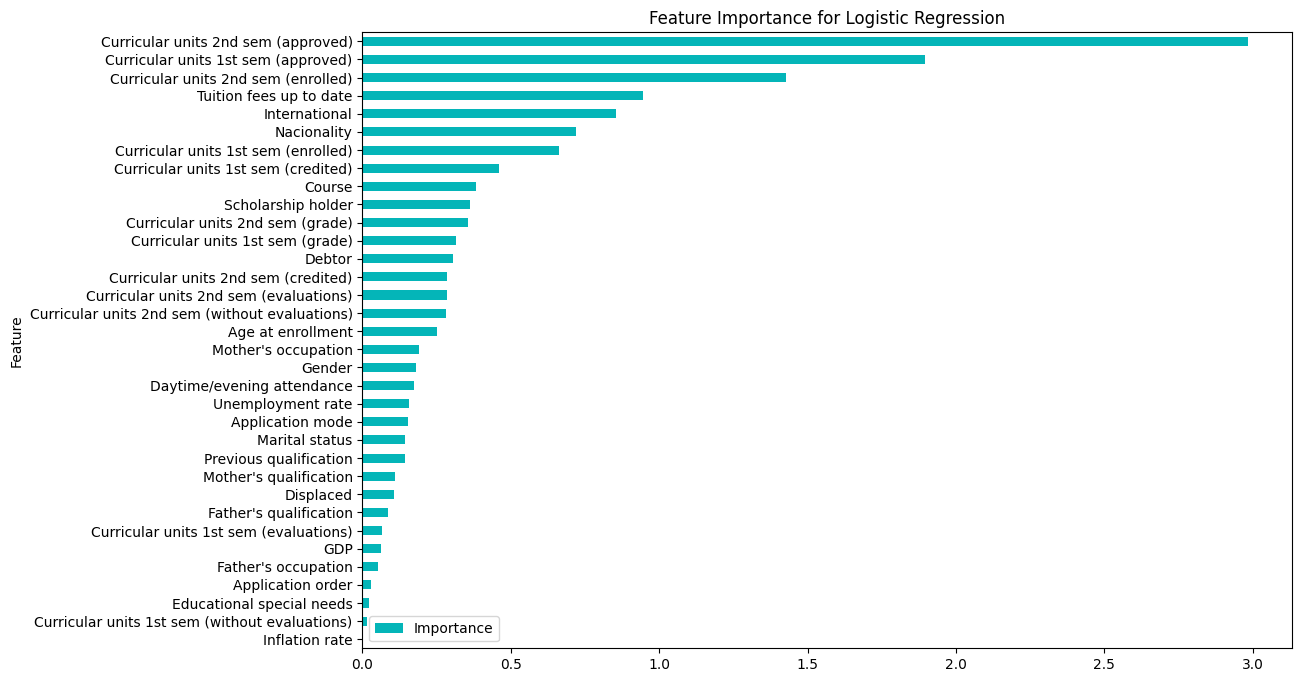

In [554]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(12,8), color='#04b5b8')
plt.title('Feature Importance for Logistic Regression')

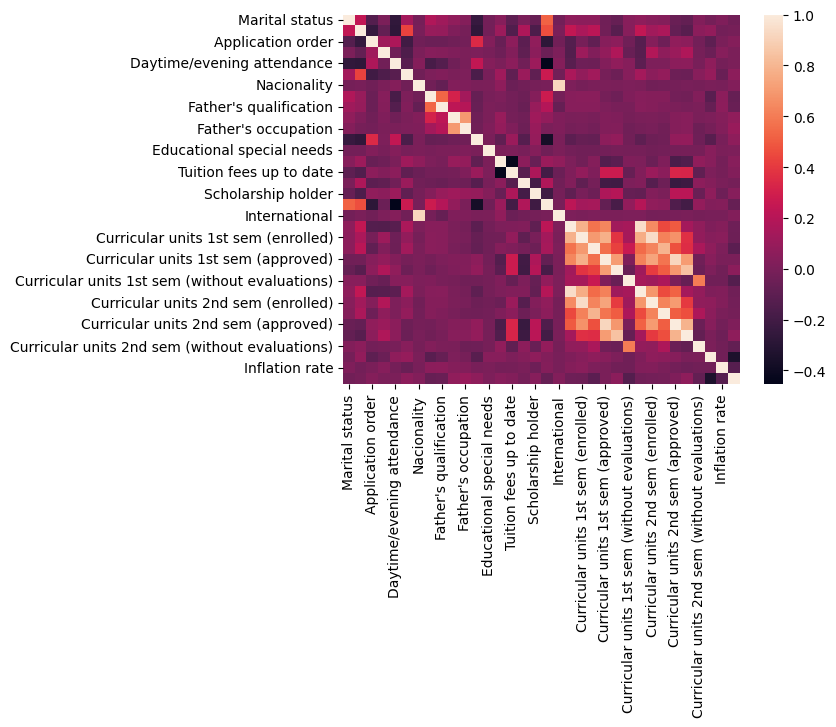

In [555]:
corrMatrix = inputs.corr()
sns.heatmap(corrMatrix)
plt.show()

In [259]:
inputs.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.0,0,10.8,1.4,1.74


<Axes: >

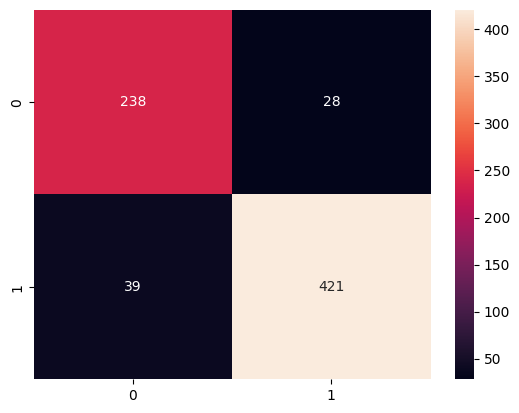

In [558]:
y_predict = logReg.predict(X_test)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict, y_test), annot = True, fmt = 'g')

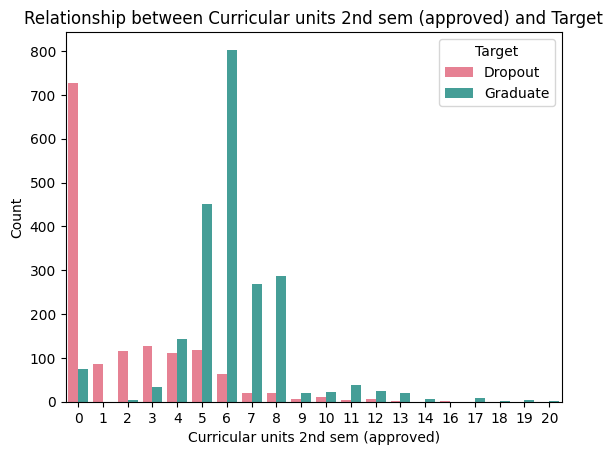

In [562]:
sns.countplot(x='Curricular units 2nd sem (approved)', hue='Target', data=df)
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Count')
plt.title('Relationship between Curricular units 2nd sem (approved) and Target')
plt.show()

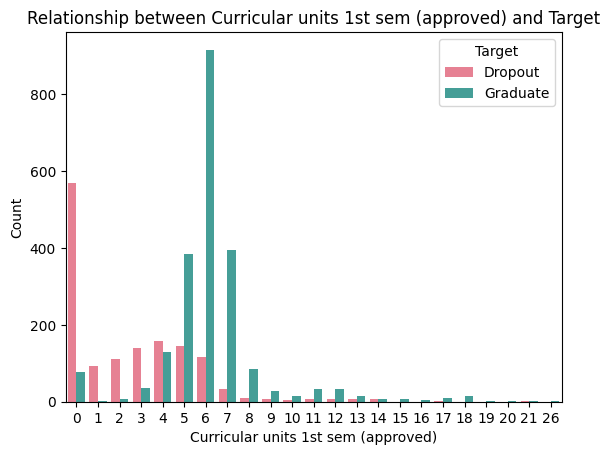

In [563]:
# Relationship between Curricular units 1st sem (approved) and Target
sns.countplot(x='Curricular units 1st sem (approved)', hue='Target', data=df)
plt.xlabel('Curricular units 1st sem (approved)')
plt.ylabel('Count')
plt.title('Relationship between Curricular units 1st sem (approved) and Target')
plt.show()

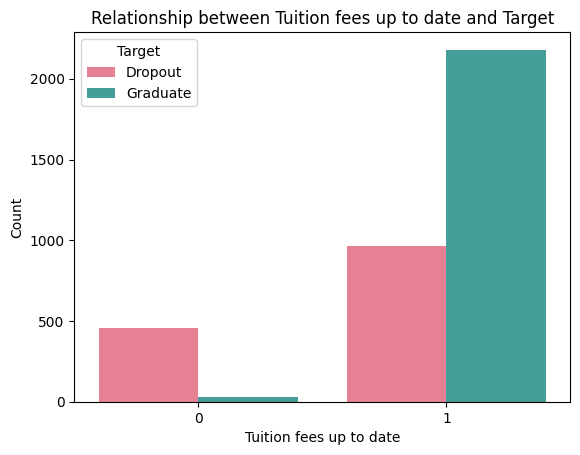

In [564]:
sns.countplot(x='Tuition fees up to date', hue='Target', data=df)
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.title('Relationship between Tuition fees up to date and Target')
plt.show()

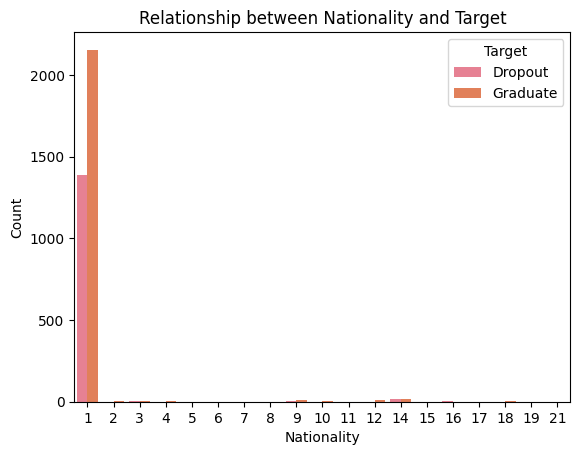

In [580]:
sns.countplot(x='Nationality', hue='Target', data=df)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Relationship between Nationality and Target')
plt.show()

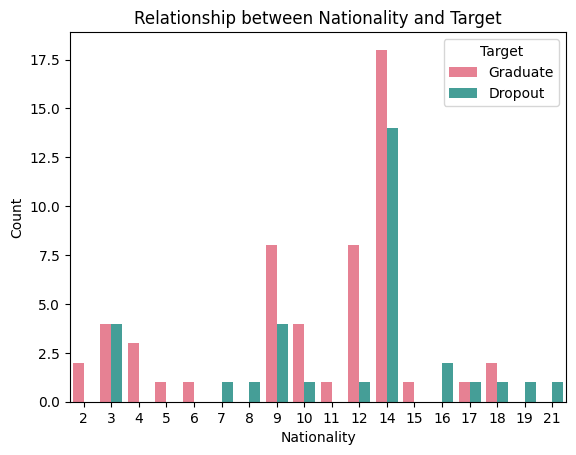

In [567]:
filtered_df = df[df['Nationality'] != 1]
# Create the countplot using the filtered DataFrame
sns.countplot(x='Nationality', hue='Target', data=filtered_df)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Relationship between Nationality and Target')
plt.show()

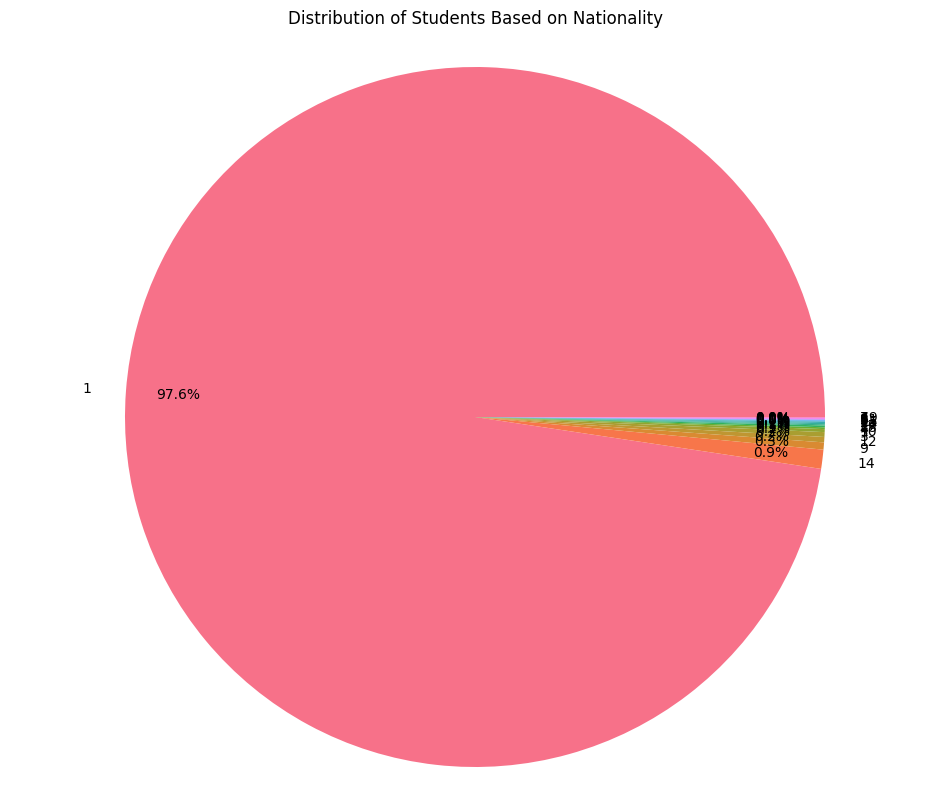

In [568]:
nationality_counts = df['Nationality'].value_counts()
# Plot a pie chart
plt.figure(figsize=(12, 10))
colors = sns.color_palette("husl", len(nationality_counts))
sns.set_palette(colors)
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=0, pctdistance=0.85)
plt.axis('equal')
plt.title('Distribution of Students Based on Nationality')
plt.show()

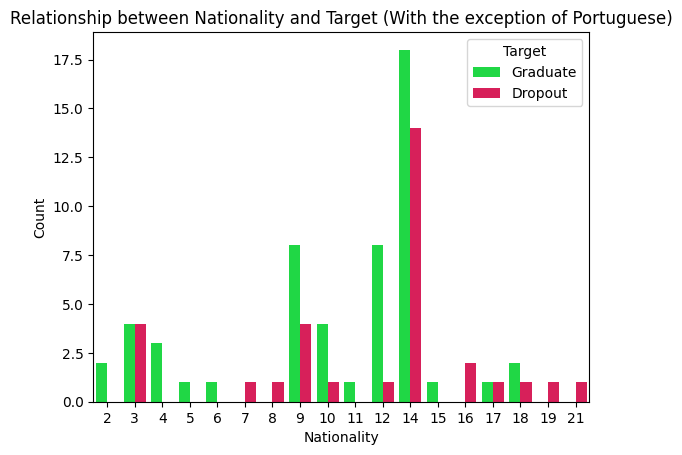

In [569]:
filtered_df = df[df['Nationality'] != 1]

# Create the countplot using the filtered DataFrame
sns.countplot(x='Nationality', hue='Target', data=filtered_df, palette=['#02f533','#f5024f'])
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Relationship between Nationality and Target (With the exception of Portuguese)')
plt.show()

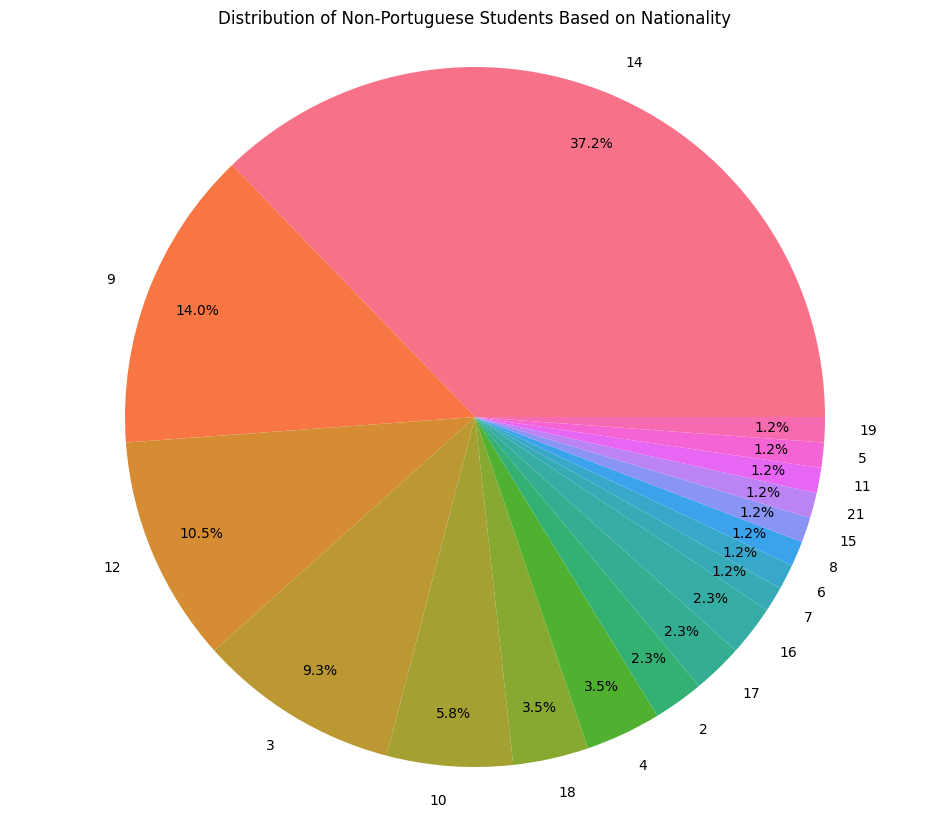

In [570]:
filtered_df = df[df['Nationality'] != 1]
nationality_counts = filtered_df['Nationality'].value_counts()
plt.figure(figsize=(12, 10))
colors = sns.color_palette("husl", len(nationality_counts))
sns.set_palette(colors)
plt.pie(nationality_counts, labels=nationality_counts.index, autopct='%1.1f%%', startangle=0, pctdistance=0.85)
plt.axis('equal')
plt.title('Distribution of Non-Portuguese Students Based on Nationality')
plt.show()

In [211]:
avg_importance = np.mean(np.abs(logReg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': inputs.columns,'Importance': avg_importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
28,Curricular units 2nd sem (approved),3.008009
22,Curricular units 1st sem (approved),1.904330
26,Curricular units 2nd sem (enrolled),1.554974
14,Tuition fees up to date,0.895968
18,International,0.804843
6,Nationality,0.644460
20,Curricular units 1st sem (enrolled),0.538516
19,Curricular units 1st sem (credited),0.485215
29,Curricular units 2nd sem (grade),0.483026
3,Course,0.440573


In [269]:
#Since some columns like Inflation rate, Application order, etc. Were not so important let's drop them and see if we will get a better score.
new_inputs = inputs.drop(["Inflation rate", "Curricular units 1st sem (without evaluations)","Educational special needs",
                          "Application order", "Father's occupation","GDP", "Curricular units 1st sem (evaluations)",
                          "Father's qualification"], axis='columns')


In [270]:
new_inputs.head(2)

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Mother's occupation,Displaced,Debtor,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate
0,1,8,2,1,1,1,13,6,1,0,...,0,0,0.0,0,0,0,0,0.000000,0,10.8
1,1,6,11,1,1,1,1,4,1,0,...,6,6,14.0,0,6,6,6,13.666667,0,13.9


In [271]:
X_train, X_test, y_train, y_test = train_test_split(new_inputs, target, test_size=0.2, random_state = 42)

In [272]:
# Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [273]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [292]:
# Training
logReg.fit(X_train, y_train)

LogisticRegression()

In [293]:
y_test

847     1
3927    0
524     0
223     1
3198    0
       ..
1669    1
3377    1
3634    1
3038    1
2836    0
Name: target, Length: 726, dtype: int64

In [294]:
logReg.predict(X_test) # We can see the predictions are pretty similar to the actual values

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [277]:
logReg.score(X_test, y_test) # our model is now a little bit better than before

0.9090909090909091

In [310]:
logReg.score(X_train, y_train)

0.9163223140495868

In [311]:
y_predict = logReg.predict(X_test)

<Axes: >

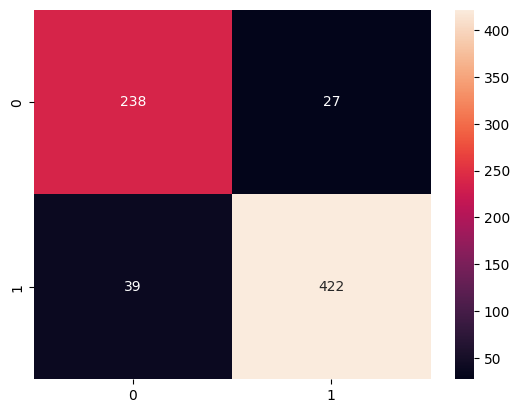

In [312]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_predict, y_test), annot = True, fmt = 'g')

In [316]:
from sklearn.metrics import accuracy_score
max_acc = 0
best_threshold = 0
for i in np.arange(0,2,0.05):
  y_pred_temp = logReg.predict_proba(X_test)
  y_pred_temp = [1 if x[1] > float("{:.2f}".format(i)) else 0 for x in y_pred_temp]
  acc = accuracy_score(y_pred_temp, y_test)
  if acc > max_acc:
    max_acc = acc
    best_threshold = i
print(f"Maximum accuracy from threshold tweaking: {max_acc}")

Maximum accuracy from threshold tweaking: 0.9146005509641874


<Axes: >

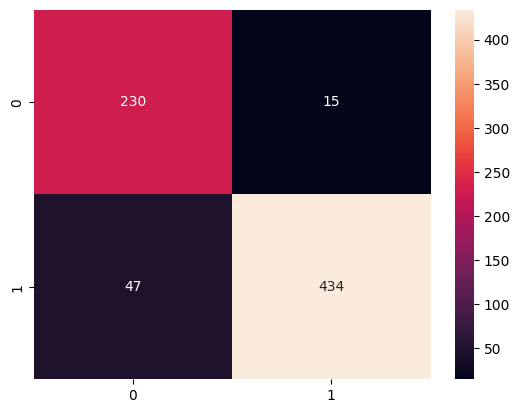

In [317]:
y_pred_best_threshold = logReg.predict_proba(X_test)
y_pred_best_threshold = [1 if x[1] > best_threshold else 0 for x in y_pred_best_threshold]
sns.heatmap(confusion_matrix(y_pred_best_threshold, y_test), annot = True, fmt = 'g')

Area Under the ROC Curve for threshold 0.5: 0.9577400239601842
Area Under the ROC Curve for threshold 0.40: 0.8984586686821096


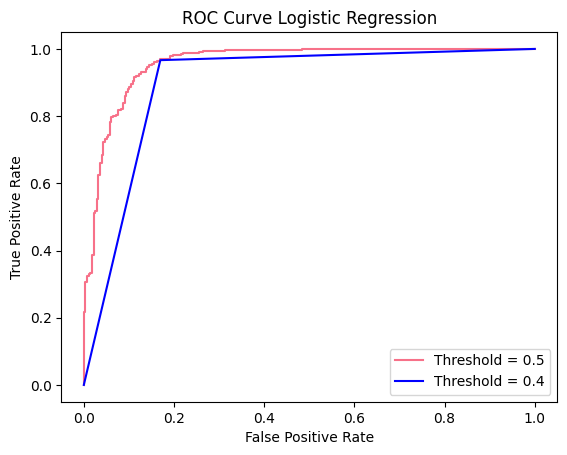

In [323]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# ROC Curve
y_scores = logReg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr,  label = 'Threshold = 0.5')
print('Area Under the ROC Curve for threshold 0.5:',
      roc_auc_score(y_test, y_scores))

# For our newer better threshold
auc_score_logR = roc_auc_score(y_test, y_pred_best_threshold)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_best_threshold)
print(f'Area Under the ROC Curve for threshold {best_threshold:.2f}:',
      auc_score_logR)
plt.plot(fpr_, tpr_, label = f'Threshold = {best_threshold}', color='blue')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend()
plt.show()

Decision tree algorithm

In [571]:
# Now et's try Decision tree algorithm
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()

In [572]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [574]:
dt_model.score(X_test, y_test)

0.8429752066115702

In [575]:
dt_model.score(X_train, y_train)

1.0

<Axes: >

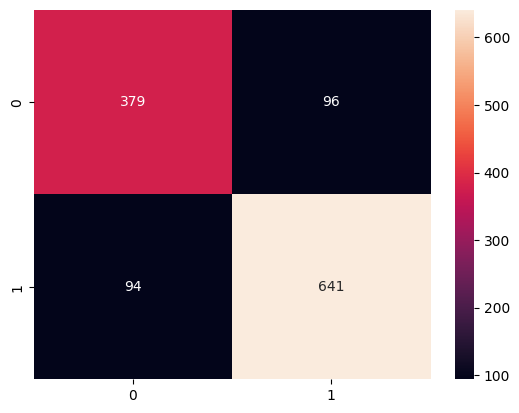

In [581]:
y_predict2 = dt_model.predict(X_test)
sns.heatmap(confusion_matrix(y_predict2, y_test), annot = True, fmt = 'g')

In [583]:
# Let's try with it with the original inputs
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state = 42)

# Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

dt_model = tree.DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [584]:
y_predict2 = dt_model.predict(X_test)
y_predict2

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [585]:
dt_model.score(X_test, y_test) # Well the score didn't change that much but it's a liiiiittle bit better!

0.8443526170798898

In [586]:
dt_model.score(X_train, y_train)

1.0

<Axes: >

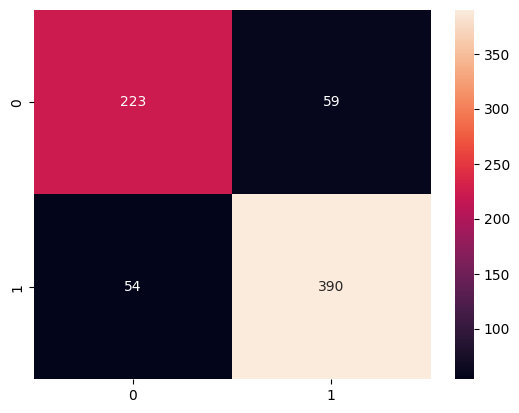

In [587]:
sns.heatmap(confusion_matrix(y_predict2, y_test), annot = True, fmt = 'g')

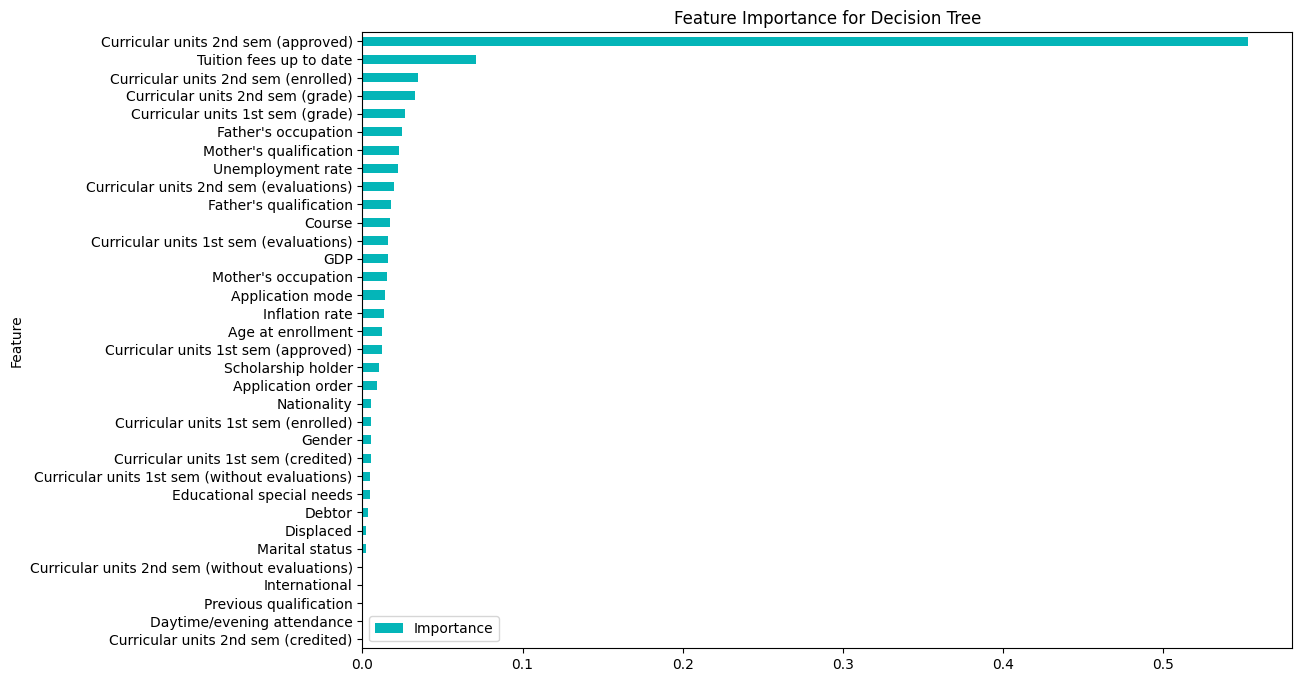

In [345]:
avg_importance = dt_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': inputs.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

# Plot the feature importance
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(12, 8), color='#04b5b8')
plt.title('Feature Importance for Decision Tree')
plt.show()
# we can see that Feature importance is different for the Decision Tree Algorithm

In [362]:
# Let's try adjusting the inputs accordind to Decision Tree feature importance
inputs.columns
dtInputs = inputs.drop(["Curricular units 2nd sem (credited)","Daytime/evening attendance","Previous qualification",
                        "International","Curricular units 2nd sem (without evaluations)","Marital status", "Displaced","Debtor"], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(dtInputs, target, test_size=0.2, random_state = 42)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [363]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [364]:
dt_model.score(X_test, y_test) # Dropping the least important columns did not really change the score that much

0.8305785123966942

 Support Vector Machine (SVM)

In [588]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state = 42)
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [589]:
from sklearn.svm import SVC
svc_model = SVC()

In [590]:
svc_model.fit(X_train, y_train)

SVC()

In [594]:
svc_model.score(X_test, y_test)

0.8994490358126722

<Axes: >

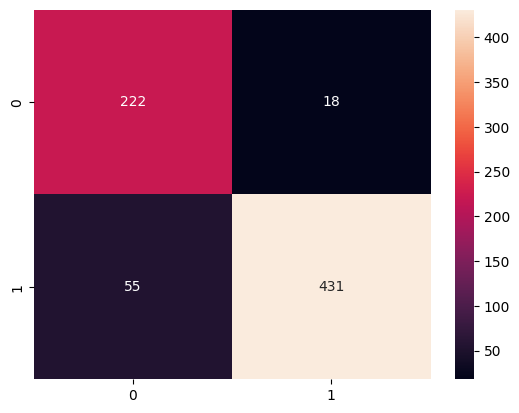

In [595]:
y_predictSvc = svc_model.predict(X_test)
sns.heatmap(confusion_matrix(y_predictSvc, y_test), annot = True, fmt = 'g')

Random **Forest**

In [608]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state = 42)
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [609]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [610]:
rf_model.score(X_test, y_test)

0.9022038567493113

<Axes: >

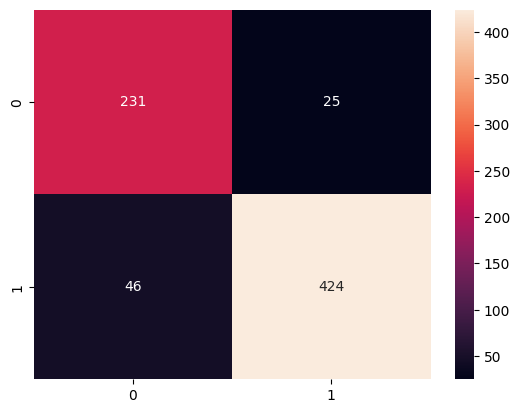

In [611]:
y_predictRf = rf_model.predict(X_test)
sns.heatmap(confusion_matrix(y_predictRf, y_test), annot = True, fmt = 'g')

# Gaussian Naive Bayes Classifier

In [613]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
GNB_model = GaussianNB()

In [615]:
GNB_model.fit(X_train,y_train)

GaussianNB()

In [616]:
GNB_model.score(X_train,y_train)

0.84366391184573

<Axes: >

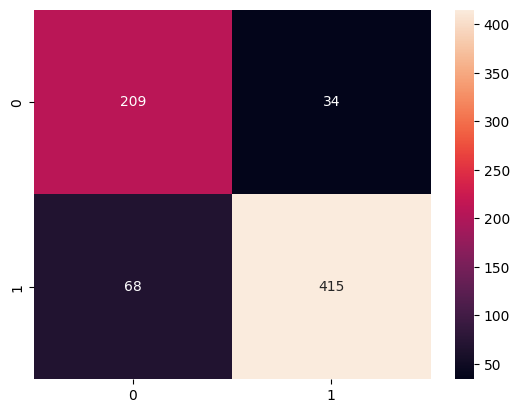

In [617]:
y_predictGNB = GNB_model.predict(X_test)
sns.heatmap(confusion_matrix(y_predictGNB, y_test), annot = True, fmt = 'g')

In [619]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [620]:
 # K Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_dt = []
scores_svm = []
scores_rf = []
scores_GNB = []



for train_index, test_index in folds.split(inputs, target):
    train_index = train_index.astype(int)
    test_index = test_index.astype(int)

    X_train, X_test, y_train, y_test = inputs.iloc[train_index], inputs.iloc[test_index], \
                                       target.iloc[train_index], target.iloc[test_index]

    # Logistic Regression
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, X_test, y_train, y_test))

    # Decision Tree
    scores_dt.append(get_score(tree.DecisionTreeClassifier(), X_train, X_test, y_train, y_test))

    # Support Vector Machine
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))

    # Random Forest
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=50), X_train, X_test, y_train, y_test))

    # Gaussian Naive Bayes
    scores_GNB.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))

In [621]:
scores_logistic

[0.9165289256198347, 0.9074380165289256, 0.9140495867768595]

In [622]:
scores_dt

[0.8545454545454545, 0.8396694214876033, 0.8512396694214877]

In [623]:
scores_svm

[0.8834710743801653, 0.8768595041322315, 0.8917355371900827]

In [624]:
scores_rf

[0.9066115702479339, 0.9049586776859504, 0.9041322314049587]

In [625]:
scores_GNB

[0.8512396694214877, 0.8388429752066116, 0.8338842975206612]

In [626]:
# Hyper parameter Tuning (GridSearchCV)
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },
    'gaussian_naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    }
}

In [627]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(inputs, target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.911846,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.898898,{'n_estimators': 10}
2,logistic_regression,0.912948,{'C': 1}
3,gaussian_naive_bayes,0.844628,{}
4,decision_tree,0.860606,{'criterion': 'entropy'}
